#### Import Libraries

In [1]:
from sklearn.metrics import cohen_kappa_score,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import pandas as pd
from sklearn import metrics

In [2]:
df = pd.read_csv('../Dataset/Annotate_Dataset/comments_annotated.csv')
df.head()

,Comment,Tag_Nalin,Type_Nalin,Tag_Shu,Type_Shu
0,yeah i am😈😈,Non-Hated,amazement,Non-Hated,amazement
1,the story line on some💀,Hated,sarcastic,Hated,sarcastic
2,early 19th century in Haití ☠️☠️☠️,Hated,threat,Hated,threat
3,The same 🤡 who took from a kid’s cancer charit...,Hated,criticism,Hated,sarcastic
4,mass 🔫 and 💀,Hated,threat,Hated,threat


In [3]:
rater1 = df['Type_Nalin'].to_list()
rater2 = df['Type_Shu'].to_list()
labels = list(df['Type_Nalin'].value_counts().keys())

In [4]:
len(rater2)

200

In [5]:
len(labels)

19

In [79]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix

# Sample data
list1 = rater1
list2 = rater2
labels = []
cohen_values = []

# Get unique categories
categories = list(set(list1 + list2))
# print(categories)

# Initialize dictionaries to store results
category_agreement = {}
category_counts = {}

# Calculate agreement for each category
for category in categories:
    labels.append(category)
    # print(list1)
    # Filter the lists for the current category
    filtered_list1 = [1 if x == category else 0 for x in list1]
    filtered_list2 = [1 if x == category else 0 for x in list2]

    # Calculate agreement and confusion matrix for the category
    category_agreement[category] = cohen_kappa_score(filtered_list1, filtered_list2)
    category_counts[category] = confusion_matrix(filtered_list1, filtered_list2)
    cohen_values.append(category_agreement[category])

# Print results for each category
for category in categories:
    print(f"Category: {category}")
    print(f"Agreement: {category_agreement[category]}")
    # print(f"Confusion matrix:\n{category_counts[category]}\n")


Category: humorous
Agreement: 0.8884758364312267
Category: derogatory
Agreement: 0.5562130177514792
Category: disgust
Agreement: 0.4512195121951219
Category: sweet
Agreement: 0.8520710059171598
Category: support
Agreement: 0.7894736842105263
Category: accusatory
Agreement: 0.8863636363636364
Category: rebellious
Agreement: 0.7452229299363058
Category: discriminatory
Agreement: 0.7039230199851961
Category: amusement
Agreement: 0.9573378839590444
Category: respect
Agreement: 0.2732558139534884
Category: threat
Agreement: 0.8520710059171598
Category: excitement
Agreement: 0.9065420560747663
Category: admiration
Agreement: 0.6853146853146853
Category: sarcastic
Agreement: 0.6746203904555315
Category: amazement
Agreement: 0.8641765704584041
Category: criticism
Agreement: 0.5556789780616496
Category: acknowledgement
Agreement: 0.7922437673130194
Category: mocking
Agreement: 0.8951048951048951
Category: concerning
Agreement: 1.0


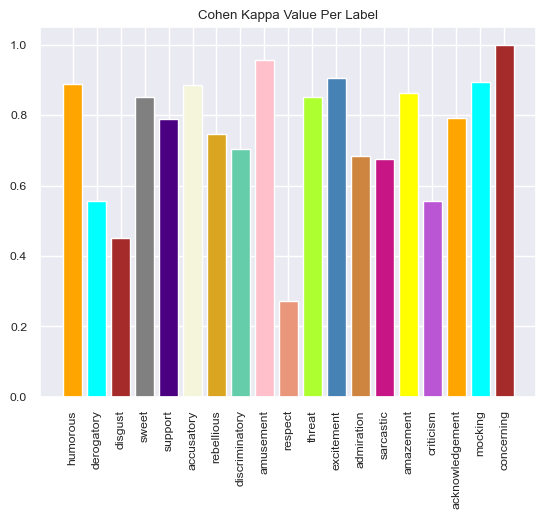

In [84]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
height = cohen_values
bars = tuple(labels)
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=["orange", "cyan", "brown",
		"grey", "indigo", "beige","goldenrod", "mediumaquamarine","pink","darksalmon","greenyellow","steelblue","peru","mediumvioletred","yellow","mediumorchid"])

# Create names on the x-axis
plt.xticks(x_pos, bars, rotation=90)
plt.title("Cohen Kappa Value Per Label")

# Show graph
plt.show()

In [6]:
for i, label in enumerate(labels):
    print(str(i) + ":" + str(label))

0:sarcastic
1:criticism
2:amazement
3:admiration
4:mocking
5:humorous
6:amusement
7:support
8:concerning
9:discriminatory
10:acknowledgement
11:derogatory
12:threat
13:sweet
14:rebellious
15:disgust
16:excitement
17:accusatory
18:respect


#### Calculate Cohen Kappa Score

In [7]:
#calculate Cohen's Kappa
print("Cohen kappa score between Nalin and Shu : ", cohen_kappa_score(rater1, rater2))

Cohen kappa score between Nalin and Shu :  0.7584541062801933


#### Plot Annotation agreement Confusion Matrix

In [154]:
# multiclass = np.array([rater1]+[rater2])
# multiclass

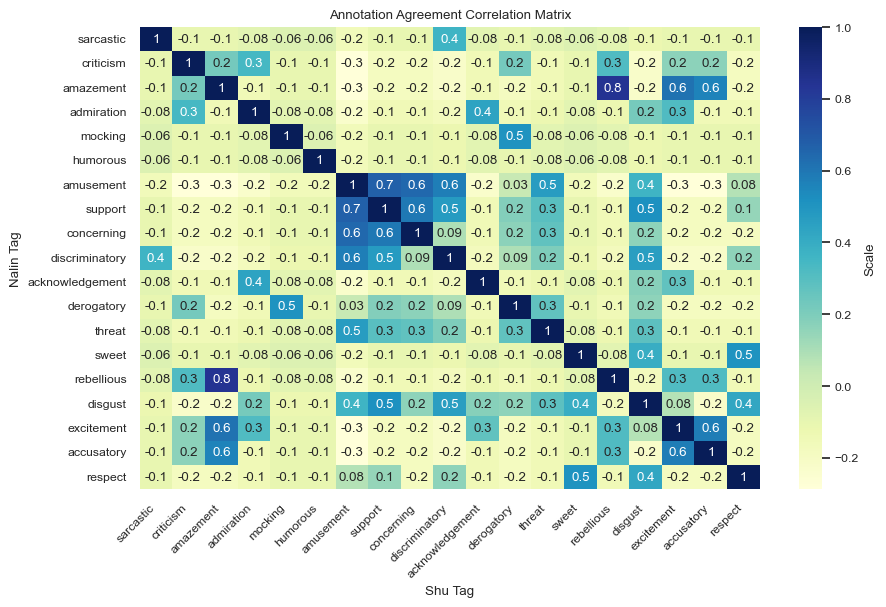

In [85]:
def plot_confusion_matrix(data, labels, output_filename):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(10, 6))
 
    seaborn.set(font_scale=0.8)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'},fmt='.1g')

    # Set the tick labels
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_yticklabels(labels, rotation=0)
 
    ax.set(ylabel="Nalin Tag", xlabel="Shu Tag")
    plt.title("Annotation Agreement Correlation Matrix")
    plt.show()
 
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.close()

cm = metrics.confusion_matrix(rater1, rater2)
df = pd.DataFrame(cm)
# create confusion matrix
labels = ["sarcastic", "criticism", "amazement", "admiration","mocking",'humorous','amusement','support',
          "concerning","discriminatory","acknowledgement","derogatory",'threat','sweet','rebellious','disgust',
          'excitement','accusatory','respect']
plot_confusion_matrix(df.corr(method = 'spearman'), labels, "../plot/confusion_matrix.png")

In [37]:
rater1 = df['Tag_Nalin'].to_list()
rater2 = df['Tag_Shu'].to_list()
labels = list(df['Tag_Nalin'].value_counts().keys())

In [38]:
for i, label in enumerate(labels):
    print(str(i) + ":" + str(label))

0:Hated
1:Non-Hated


In [39]:
#calculate Cohen's Kappa
print("Cohen kappa score between Nalin and Shu : ", cohen_kappa_score(rater1, rater2))

Cohen kappa score between Nalin and Shu :  0.96999399879976


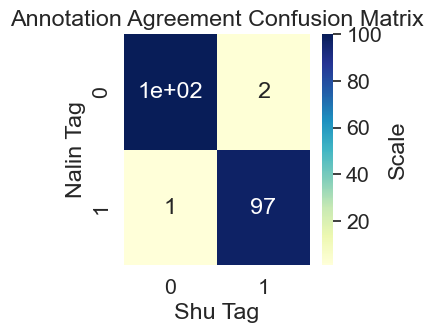

In [41]:
def plot_confusion_matrix(data, labels, output_filename):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(3, 3))
 
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set(ylabel="Nalin Tag", xlabel="Shu Tag")
    plt.title("Annotation Agreement Confusion Matrix")
    plt.show()
 
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.close()
 
cm = metrics.confusion_matrix(rater1, rater2)
# create confusion matrix
plot_confusion_matrix(cm, labels, "../plot/confusion_matrix_hate_non_hate.png")